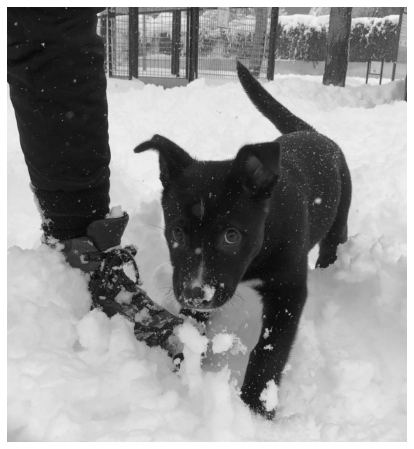

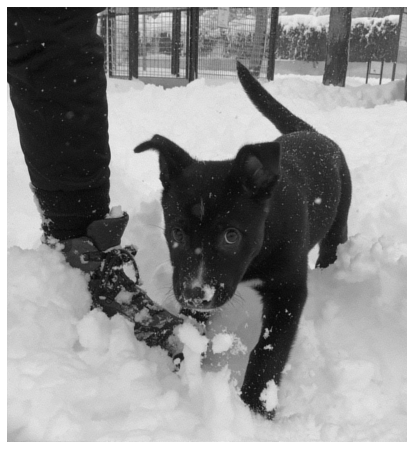

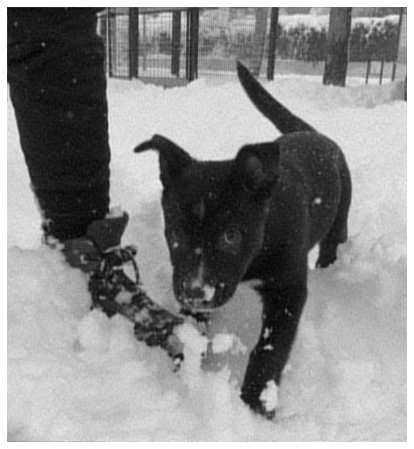

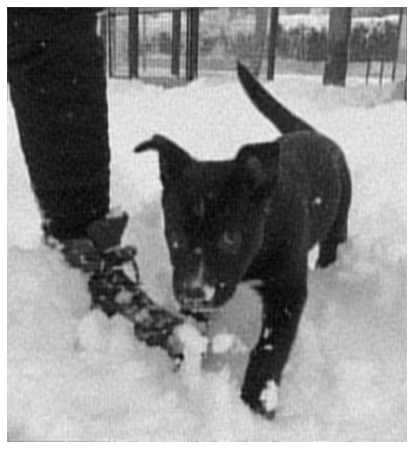

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
plt.rcParams['figure.figsize']=[8,8]
plt.rcParams.update({'font.size':20})


LOLA = mpimg.imread(os.path.join('C:\\Users\\SE79065\\Documents\\CompressiveSensing\\images\\LOLA.jpg'))
BW = np.mean(LOLA,-1)

Bt = np.fft.fft2(BW)
Btsort = np.sort(np.abs(Bt.reshape(-1))) # sort by magnitude

# Zero out all small coefficients and inverse transform
for keep in (0.1, 0.05, 0.01, 0.005):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh          # Find small indices
    Atlow = Bt * ind                 # Threshold small indices
    Alow = np.fft.ifft2(Atlow).real  # Compressed image
    plt.figure()
    plt.imshow(Alow,cmap='gray')
    plt.axis('off')


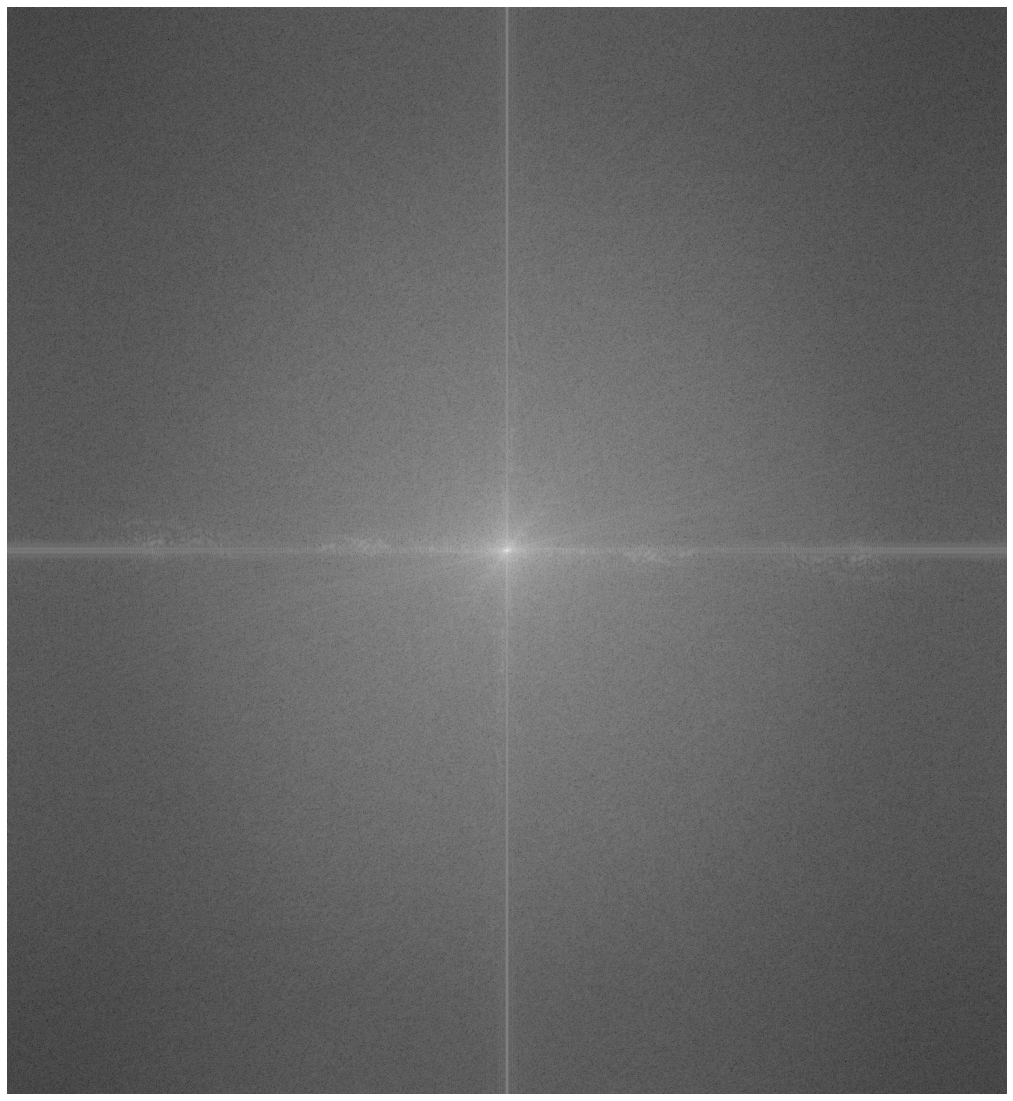

In [11]:
#Visualize in the Fourier domain
At = np.fft.fft2(BW)
F = np.log(np.abs(np.fft.fftshift(At))+1) # Put FFT on log scale
plt.imshow(F,cmap='gray')
plt.axis('off')
plt.show()